In [1]:
import torch


In [2]:
trainingDataCoeffs = torch.load('/home/ramana44/oasis_mri_2d_slices_hybridAutoencodingSmartGridAlphaHalf_75_RK_LossWithImage/savedDatasetAndCoeffs/trainDataRK_coeffs.pt')

In [3]:
trainingDataCoeffs.shape

torch.Size([50000, 6561])

In [4]:
import concurrent.futures
import secrets
import time
from unittest import result

from pkg_resources import find_distributions


import numpy as np
import torch
import sys
sys.path.insert(1, '/home/suarez08/PhD_PINNs/PIPS_framework')
from jmp_solver.sobolev import Sobolev
from jmp_solver.sobolev import Sobolev
from jmp_solver.solver import Solver
from jmp_solver.utils import matmul
import jmp_solver.surrogates
import time
sys.path.insert(1, '/home/suarez08/minterpy/src')
import minterpy as mp
from jmp_solver.diffeomorphisms import hyper_rect
import matplotlib
import matplotlib.pyplot as plt
#style.use('dark_background')
matplotlib.rcdefaults() 
torch.set_printoptions(precision=10)
import nibabel as nib     # Read / write access to some common neuroimaging file formats
import ot
import scipy
import scipy.integrate

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = torch.device('cpu')

torch.set_default_dtype(torch.float64)

In [5]:
deg_quad = 80
u_ob = jmp_solver.surrogates.Polynomial(n=deg_quad,p=np.inf, dim=2)
x = np.linspace(-1,1,96)
X_p = u_ob.data_axes([x,x]).T

In [6]:
X_p.shape

torch.Size([9216, 6561])

In [7]:
im = torch.matmul(X_p, trainingDataCoeffs[0])
im[torch.where(im<0)] = 0
im = im.reshape(96,96)

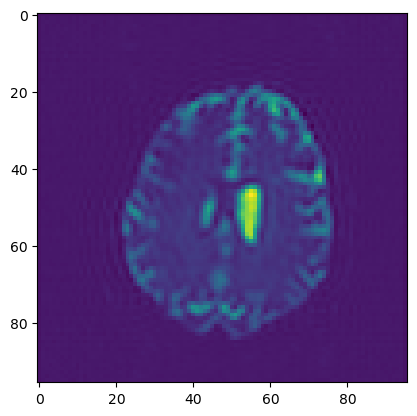

In [8]:
plt.imshow(im)

In [9]:
trainingDataCoeffs = trainingDataCoeffs[:200]

In [12]:
trainingDataCoeffs.shape

torch.Size([200, 6561])

In [10]:
reconstructionH = (torch.matmul(X_p, trainingDataCoeffs.squeeze(1).T).T).reshape(trainingDataCoeffs.shape[0], 1, 96, 96)

In [11]:
reconstructionH.shape

torch.Size([200, 1, 96, 96])

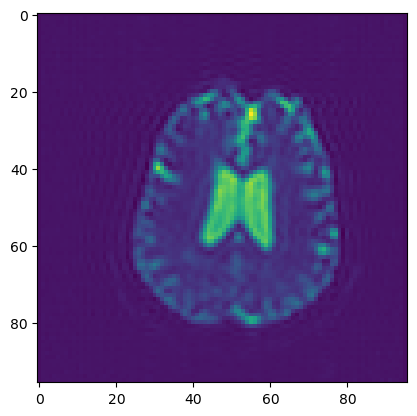

In [21]:
plt.imshow(reconstruction_test[500])

In [3]:
trainActualData = torch.load('/home/ramana44/oasis_mri_2d_slices_hybridAutoencodingSmartGridAlphaHalf_75_RK/savedDatasetAndCoeffs/trainDataSet.pt',map_location=torch.device('cpu'))

In [12]:
testActualData = torch.load('/home/ramana44/oasis_mri_2d_slices_hybridAutoencodingSmartGridAlphaHalf_75_RK/savedDatasetAndCoeffs/testDataSet.pt',map_location=torch.device('cpu'))

In [13]:
testActualData.shape

torch.Size([11275, 1, 96, 96])

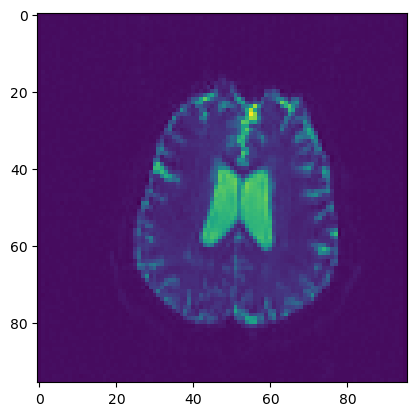

In [14]:
plt.imshow(testActualData[500][0])